In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from scipy import stats

# Predict Hert Attack based on BRFSS 2016 Data

To perform this analysis we are going to use the KDD process with the following steps:


1. Developing an understanding of:
    - the application domain
    - the relevant prior knowledge
    - the goals of the end-user
2. Creating a target data set: selecting a data set, or focusing on a subset of variables, or data samples, on which discovery is to be performed.
3. Data cleaning and preprocessing.
    - Removal of noise or outliers.
    - Collecting necessary information to model or account for noise.
    - Strategies for handling missing data fields.
    - Accounting for time sequence information and known changes.
4. Data reduction and projection.
    - Finding useful features to represent the data depending on the goal of the task.
    - Using dimensionality reduction or transformation methods to reduce the effective number of variables under consideration or to find invariant representations for the data.
5. Choosing the data mining task. Deciding whether the goal of the KDD process is classification, regression, clustering, etc.
6. Choosing the data mining algorithm(s).
7. Data mining: Searching for patterns of interest in a particular representational form or a set of such representations as classification rules or trees, regression, clustering, and so forth.
8. Interpreting mined patterns.

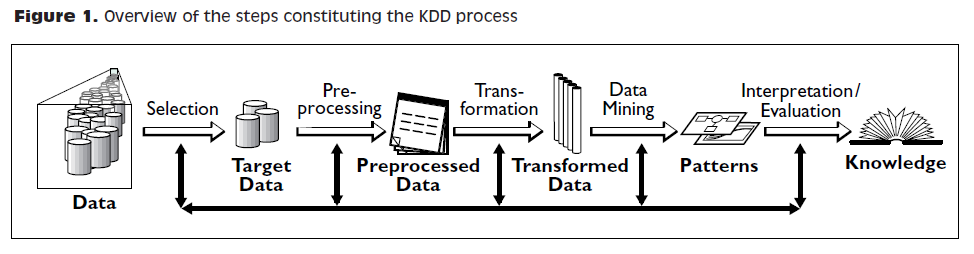

## 1. Understanding the Application Domain

The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey in the United States. The BRFSS is designed to identify risk factors in the adult population and report emerging trends. For example, respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, immunization, health status, healthy days - health-related quality of life, health care access, inadequate sleep, hypertension awareness, cholesterol awareness, chronic health conditions, alcohol consumption, fruits and vegetables consumption, arthritis burden, and seatbelt use.

The BRFSS is a system of ongoing health-related telephone surveys designed to collect data on health-related risk behaviors, chronic health conditions, and use of preventive services from the noninstitutionalized adult population ≥ 18 years residing in the United States.

In 2016, an optional module was included to provide a measure for several childhood health and wellness indicators, including asthma prevalence for people aged 17 years or younger.

## BRFSS Design
Each year, the states—represented by their BRFSS coordinators and CDC—agree on the content of the questionnaire. The BRFSS questionnaire consists of a core component, optional modules, and state-added questions.

1. Core component: A standard set of questions that all states use. Core content includes queries about current health-related perceptions, conditions, and behaviors (e.g., health status, health care access, alcohol consumption, tobacco use, fruits and vegetable consumptions, HIV/AIDS risks), as well as demographic questions. The core component includes the annual core comprising questions asked each year and rotating core questions that are included in even- and odd–numbered years.

2. Optional BRFSS modules: Sets of questions on specific topics (e.g., pre-diabetes, diabetes, sugar sweetened beverages, excess sun exposure, caregiving, shingles, cancer survivorship) that states elect to use on their questionnaires. 

3. State-added questions: Individual states develop or acquire these questions and add them to their BRFSS questionnaires. CDC does not edit, evaluate, or track the results of these questions.

## Annual Questionnaire Development

Before the beginning of the calendar year, CDC provides states with the text of the core component and the optional modules that the BRFSS will support in the coming year. States select their optional modules and ready any state-added questions they plan to use. Each state then constructs its own questionnaire. The order of the questioning is always the same—interviewers ask questions from the core component first, then they ask any questions from the optional modules, and the state-added questions.

BRFSS divides landline telephone numbers into two groups, or strata, which are sampled separately.  BRFSS puts numbers from hundred blocks with 1 or more listed household numbers (1+ blocks, or banks) in either the high-density stratum (listed 1+ blocks) or medium-density stratum (unlisted 1 + blocks).

The target population (aged 18 years and older) for cellular telephone samples in 2016 consists of people residing in a private residence or college housing who have a working cellular telephone.

## Already Performed Data Cleaning

Once data are received from a state, CDC staff run editing programs and cumulative data quality checks and note any problems in the files. A CDC programmer works with each state until any problems are optimally resolved. CDC staff generate data quality reports and share them with state coordinators, who review the reports and discuss any potential problems. Once CDC receives and validates the entire year of data for a state, processors run several year-end programs on the data. These programs perform some additional, limited data cleanup and fixes specific to each state and data year and produce reports that identify potential analytic problems with the data set. Once this step is completed, data are ready for assigning weights and adding calculated variables. Calculated variables are created for the benefit of users and can be noted in the data set by the leading underscore in the variable name. The following calculated variables are examples of results from this procedure:
- _RFSMOK3 
- _ECIGSTS
- _HCVU651. 
- _AGE80
- _DRNKDRV

**The importance of Calculated Variables**: Almost every variable derived from the BRFSS interview has a code category labeled refused and assigned values of 9, 99, or 999. These values may also be used to represent missing responses. Missing responses may be due to non-interviews and missing responses due to skip patterns in the questionnaire.

## Goal of the Analysis

The goal of this analysis is to build a prediction model for Hearth Disease.

The target variale: **_MICHD** is the calculated variable for respondents who have ever reported having coronary heart disease (CHD) or myocardial infarction (MI). _MICHD is derived from CVDINFR4, and CVDCRHD4.

1. Reported having MI Respondents who reported having had MI or CHD (CVDINFR4=1 O Ror CVDCRHD4=1)
2. Did not report Respondents who reported not having had MI and CHD (CVDINFR4=2 AND having MI or CHD CVDCRHD4=2)
3. Not asked or Missing Respondents who reported they didn ́t know, refused or had a missing value for the MI or CHD questions (CVDINFR4=7, 9 OR MISSING OR CVDCRHD4=7, 9, OR MISSING)

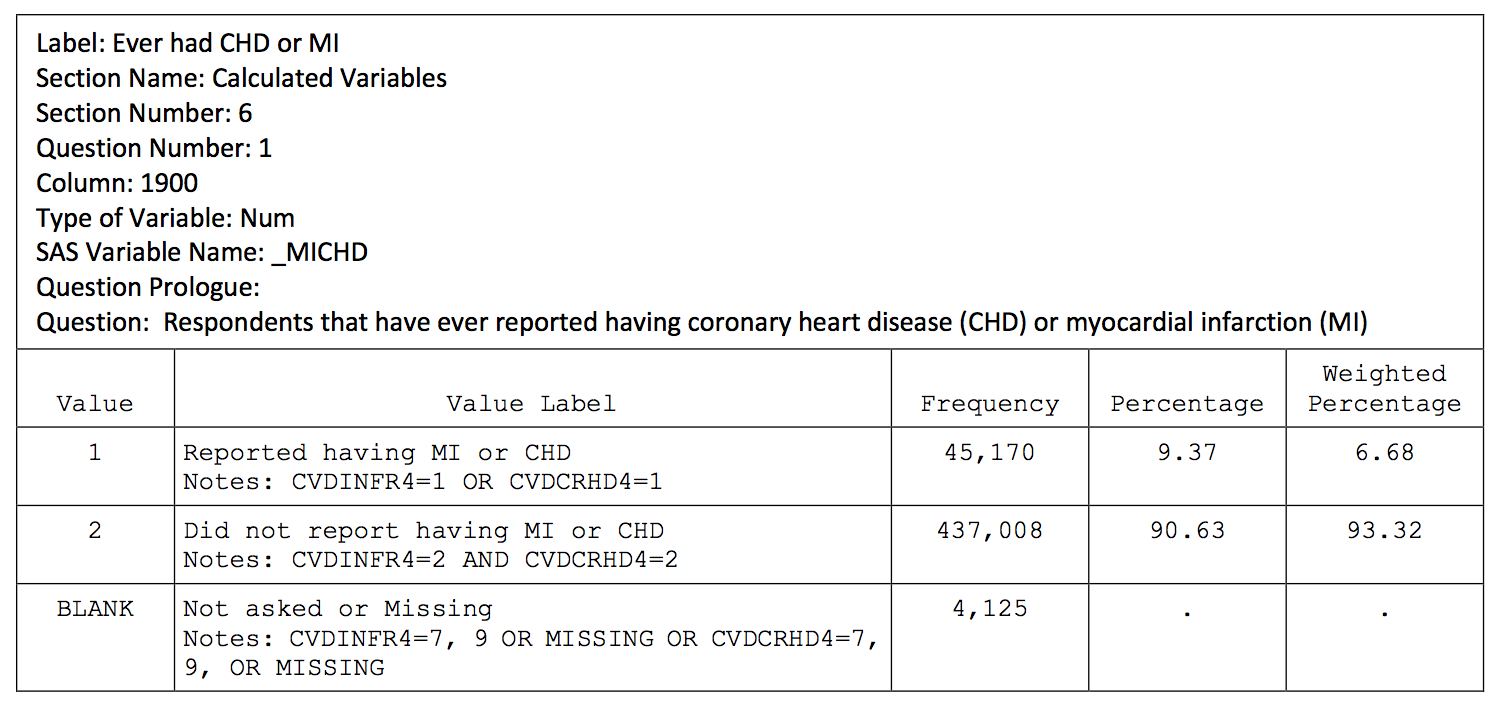

## Data Loading and Initial Selection

The BRFSS dataset is a available in a ascii format, so I need to do some data manipulation to obtain a pandas dataframe.
I have created a file with a list of all the variables from this [web page](https://www.cdc.gov/brfss/annual_data/2016/LLCP_VarLayout_16_OneColumn.html) from the variables listed in [2016 BRFSS Codebook](https://www.cdc.gov/brfss/annual_data/2016/pdf/codebook16_llcp.pdf).
During this process I have selected for removal some variables. However, in following I'll show how to remove features that:
- have more that 80% of missing values
- do not correlate with the target variable.

The goal of this preliminary analysis is to select the target variable for the analysis and to remove some non usable variables.


In [ ]:
variables = pd.read_csv('./list_variables.csv', sep=';')
variables.shape

In [ ]:
variables = variables[variables['Keep'] == 'Yes']
variables.shape

In [ ]:
variables.head()

In [ ]:
with open('./LLCP2016.asc ', encoding='iso-8859-1') as f:
    data = f.read().splitlines()

In [ ]:
cdc = pd.DataFrame({'ascii': data})

In [ ]:
cdc.head()

Decode the numeric response into features and drop the 'Var' column

In [ ]:
for i, row in variables.iterrows():
    start = row['Starting Column'] -1
    end = start + row['Field Length']
    cdc[row['Variable Name']] = cdc['ascii'].map(lambda x: x[start:end])

In [ ]:
cdc = cdc.drop('ascii',1)

In [ ]:
cdc.shape

As we can see all the data are ascii we can drop some of the non interesting columns and convert all the others

In [ ]:
cdc.head()

In [ ]:
cdc.to_pickle('dataset_loaded.pkl')

## Data Preprocessing

In [80]:
cdc = pd.read_pickle('./dataset_loaded.pkl')

In [81]:
target_variable = '_MICHD'

### Select only the complete questionnaries

1100    421192
1200     65111
Name: DISPCODE, dtype: int64


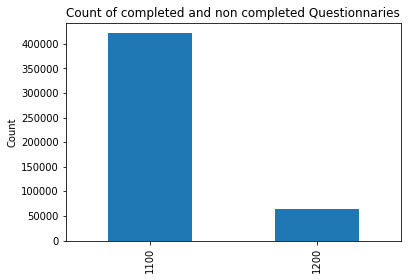

Len cdc = 486303
Len cdc after filtering = 421192


In [82]:
dispocode_counts = cdc.DISPCODE.value_counts()
print(dispocode_counts)

plot = dispocode_counts.plot.bar()
plot.axes.set_ylabel('Count')
plot.axes.set_title('Count of completed and non completed Questionnaries')
plt.show()

print('Len cdc = %d' % cdc.shape[0])
cdc = cdc[cdc['DISPCODE'] == '1100']
print('Len cdc after filtering = %d' % cdc.shape[0])

2    377506
1     40256
       3430
Name: _MICHD, dtype: int64


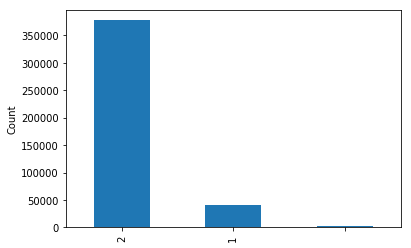

In [83]:
#let see the distribution of the target variable

target = cdc[target_variable]
print(target.value_counts())

plot = target.value_counts().plot.bar()
plot.axes.set_ylabel('Count')
plt.show()

- From the plot we see that there are some missing values to remove

In [84]:
set(target.values)

{' ', '1', '2'}

Remove rows with BLANK as target value

In [85]:
print('Len cdc = %d' % cdc.shape[0])
cdc = cdc[cdc[target_variable] != ' ']
print('Len cdc = %d' % cdc.shape[0])

Len cdc = 421192
Len cdc = 417762


2    377506
1     40256
Name: _MICHD, dtype: int64


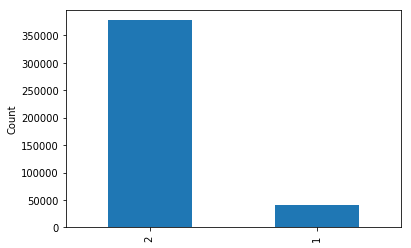

In [86]:
#let see again the distribution of the target variable
target = cdc[target_variable]
print(target.value_counts())

plot = target.value_counts().plot.bar()
plot.axes.set_ylabel('Count')
plt.show()

From the bar plot above we can see that the distribution of the target values is unbalanced

### Replace Blank with NaN

In [87]:
cdc = cdc.replace(r'\s+', np.NaN, regex=True)

### Drop columns that have more than 80% of missing values


In [88]:
num_missings = cdc.isnull().sum().sort_values(ascending=False)
non_zero = num_missings.iloc[num_missings.nonzero()[0]]
print('column with missing values ')
print(non_zero)

column with missing values 
PCPSADE1    417762
PCDMDECN    417762
DLYOTHER    417726
ASERVIST    417608
ASDRVIST    417608
ASNOSLEP    417517
ASATTACK    417415
ASRCHKUP    417415
ASTHMED3    417415
ASYMPTOM    417415
ASACTLIM    417415
ASINHALR    417415
CSRVCTL1    417359
ASTHMAGE    417243
HPVADSHT    415422
CDHELP      415377
LSTCOVRG    414635
CSRVINST    413754
USEMRJNA    412527
LENGEXAM    411903
CSRVDEIN    411817
CSRVPAIN    411817
CSRVDOC1    411817
CSRVSUM     411817
CSRVRTRN    411817
CSRVCLIN    411817
CSRVINSR    411817
PROFEXAM    411379
CASTHNO2    410337
CNCRTYP1    409754
             ...  
CIMEMLOS    343524
WRITTEN     329640
UNDRSTND    329638
MEDADVIC    329637
LSTBLDS3    319178
MARIJANA    314114
_PNEUMO2    261507
_FLSHOT6    261507
PREDIAB1    247023
PDIABTST    247021
QLACTLM2    228920
TRNSGNDR    220894
SXORIENT    220893
DRNK3GE5    205953
AVEDRNK2    205951
_CRCREC     199474
FALL12MN    194978
BLDSTOOL    132463
_BMI5CAT     25543
_BMI5        25543
_RA

In [89]:
to_drop = dict()

for k,v in non_zero.to_dict().items():
    freq = float(v) / len(cdc)
    if freq > 0.8:
        to_drop[k] = freq
            
sorted_values = sorted(to_drop.items(), key=lambda t: t[1], reverse=True)
print("feature, percentage of missing values")
for k,v in sorted_values:
    print('%s -> %5.3f' % (k,v))

feature, percentage of missing values
PCDMDECN -> 1.000
PCPSADE1 -> 1.000
DLYOTHER -> 1.000
ASERVIST -> 1.000
ASDRVIST -> 1.000
ASNOSLEP -> 0.999
ASYMPTOM -> 0.999
ASINHALR -> 0.999
ASRCHKUP -> 0.999
ASACTLIM -> 0.999
ASATTACK -> 0.999
ASTHMED3 -> 0.999
CSRVCTL1 -> 0.999
ASTHMAGE -> 0.999
HPVADSHT -> 0.994
CDHELP -> 0.994
LSTCOVRG -> 0.993
CSRVINST -> 0.990
USEMRJNA -> 0.987
LENGEXAM -> 0.986
CSRVDOC1 -> 0.986
CSRVSUM -> 0.986
CSRVRTRN -> 0.986
CSRVDEIN -> 0.986
CSRVINSR -> 0.986
CSRVPAIN -> 0.986
CSRVCLIN -> 0.986
PROFEXAM -> 0.985
CASTHNO2 -> 0.982
CNCRTYP1 -> 0.981
CNCRAGE -> 0.981
CSRVTRT1 -> 0.981
CDHOUSE -> 0.981
CDASSIST -> 0.981
CDDISCUS -> 0.981
CDSOCIAL -> 0.981
CNCRDIFF -> 0.981
DOCTDIAB -> 0.979
DIABEDU -> 0.979
INSULIN -> 0.979
DIABEYE -> 0.979
CHKHEMO3 -> 0.979
PAINACT2 -> 0.979
QLMENTL2 -> 0.979
QLHLTH2 -> 0.979
QLSTRES2 -> 0.979
CALRINFO -> 0.973
IMFVPLAC -> 0.964
SHINGLE2 -> 0.960
HPVADVC2 -> 0.946
NUMBURN2 -> 0.945
EMTSUPRT -> 0.932
LSATISFY -> 0.932
NOCOV121 -> 0.885

In [90]:
print('Shape cdc = ', cdc.shape)
cdc = cdc.drop(list(to_drop.keys()), axis=1)
print('Shape cdc = ', cdc.shape)

Shape cdc =  (417762, 141)
Shape cdc =  (417762, 73)


Now we can see that printing the non_zero values we see that their value is less than 80%.

In [91]:
num_missings = cdc.isnull().sum().sort_values(ascending=False)
non_zero = num_missings.iloc[num_missings.nonzero()[0]]
print('column with missing values %d' % len(non_zero))
print(non_zero)

column with missing values 29
WRITTEN     329640
UNDRSTND    329638
MEDADVIC    329637
LSTBLDS3    319178
MARIJANA    314114
_FLSHOT6    261507
_PNEUMO2    261507
PREDIAB1    247023
PDIABTST    247021
QLACTLM2    228920
TRNSGNDR    220894
SXORIENT    220893
DRNK3GE5    205953
AVEDRNK2    205951
_CRCREC     199474
FALL12MN    194978
BLDSTOOL    132463
_BMI5        25543
_BMI5CAT     25543
_RACE_G1      6565
_DRDXAR1      1890
GENHLTH          5
DEAF             4
VETERAN3         3
EDUCA            2
MARITAL          1
CHECKUP1         1
MEDCOST          1
PNEUVAC3         1
dtype: int64


## Data Correlations

Before moving to the Machine Learning algorithm we need to explore the correlation between the dependent variable and the indepent variables.

### Univariate Feature Selection

In statistics, Correlation is any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to the extent to which two variables have a linear relationship with each other. 
Correlations are useful because they can indicate a predictive relationship that can be exploited in practice.
Here I'm going to evaluate the correlation between the dependent variable and the independent variables, using the [Pearson correlation coefficient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr).

In [92]:
target = cdc[target_variable].astype('float32')

def correlation_to_target(c_name):
    c = cdc[c_name].astype('float32')
    return stats.pearsonr(c, target)


In [93]:
correlations = []
errors = []

import math

for c in cdc.columns:
    if c != target_variable:
        try:
            coeff, p_value = correlation_to_target(c)
            if not math.isnan(coeff):
                correlations.append((c, coeff, abs(coeff)))
        except ValueError:
            errors.append(c)

/Users/fabiofumarola/anaconda3/envs/tflow/lib/python3.5/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in float_scalars
  r = r_num / r_den


In [94]:
#checking if there are some conversion errors
print('conversion error ', errors)

conversion error  []


Now we can print the attributes ordered by the Pearson Correlation. Here I have printed the absolute value since we are interested in positive and negative correlations. We can see that there are two attributes with weak linear correlation and many others have a low correlation.

In [95]:
correlations.sort(key=lambda t: t[2], reverse=True)
for c,a,b in correlations:
    print(c, b)

_AGEG5YR 0.218619
EMPLOY1 0.209376
_HCVU651 0.19622
_RFHLTH 0.172963
DIABETE3 0.164969
DIFFWALK 0.152565
_PHYS14D 0.1225
INTERNET 0.119488
CVDSTRK3 0.103224
CHCCOPD1 0.0969069
_TOTINDA 0.0902222
_EDUCAG 0.0797047
DIFFALON 0.0787579
SEX 0.0740761
DIFFDRES 0.0691558
CHCSCNCR 0.0631992
_SMOKER3 0.0631533
CHCOCNCR 0.0590041
_INCOMG 0.0580558
BLIND 0.056628
DRNKANY5 0.0517653
CHCKIDNY 0.0511579
DECIDE 0.0453588
ADDEPEV2 0.0427367
_MENT14D 0.0401505
_LTASTH1 0.0398985
TETANUS 0.0345553
SLEPTIM1 0.0283323
_RFBING5 0.0247487
IDAY 0.0234615
ECIGARET 0.0139511
_RFDRHV5 0.0123516
RENTHOM1 0.010631
IYEAR 0.00774393
IMONTH 0.0073793
FMONTH 0.00730697
_PRACE1 0.00719052
IDATE 0.00680047
_CURECIG 0.00252415
_STATE 0.0021974
USENOW3 0.000530751
INCOME2 0.000147716


### Random forest feature importance

Another, more robust approach to do feature selection is Random Forest Selection.
Random forests are among the most popular machine learning methods thanks to their relatively good accuracy, robustness and ease of use.

Thus when training a tree, it can be computed how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure.

In [96]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [97]:
cdc.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,GENHLTH,MEDCOST,CHECKUP1,...,_EDUCAG,_INCOMG,_SMOKER3,_CURECIG,DRNKANY5,_RFBING5,_RFDRHV5,_FLSHOT6,_PNEUMO2,_CRCREC
0,01,01,01072016,01,07,2016,1100,1,2,1,...,2,3,4,1,2,1,1,NaN,NaN,NaN
1,01,01,01112016,01,11,2016,1100,2,2,1,...,2,5,4,1,2,1,1,NaN,NaN,1
2,01,01,01062016,01,06,2016,1100,3,2,1,...,3,5,1,1,1,1,1,1,1,NaN
3,01,01,01082016,01,08,2016,1100,3,2,1,...,4,5,3,1,2,1,1,1,1,1
4,01,01,01052016,01,05,2016,1100,5,2,1,...,2,9,4,1,2,1,1,NaN,NaN,NaN


In [98]:
# Define the X
dropped = cdc.drop([target_variable], axis=1)
X = dropped.fillna(0).values
X

array([['01', '01', '01072016', ..., 0, 0, 0],
       ['01', '01', '01112016', ..., 0, 0, '1'],
       ['01', '01', '01062016', ..., '1', '1', 0],
       ..., 
       ['78', '12', '12312016', ..., 0, 0, 0],
       ['78', '12', '12192016', ..., 0, 0, 0],
       ['78', '12', '12092016', ..., 0, 0, '2']], dtype=object)

In [99]:
# Define the y
y = cdc[target_variable].values

In [100]:
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Here we can see that some features like IDATE, IDAY, FMONTH, IMONTH which rank higher needs to be removed since are very good to discriminate from a Information Gain point of view but do not help to build a model that generalize.

In [101]:
importances = list(zip(dropped.columns, model.feature_importances_))
importances.sort(key=lambda t: t[1], reverse=True)
importances

[('GENHLTH', 0.031463691260393709),
 ('_AGEG5YR', 0.02526525184656464),
 ('EMPLOY1', 0.024360892248650071),
 ('IDAY', 0.024301796510768869),
 ('_BMI5', 0.023968091736638161),
 ('IDATE', 0.023342186855682606),
 ('_STATE', 0.022575863041006158),
 ('SLEPTIM1', 0.022321181185599701),
 ('FMONTH', 0.021745280588122196),
 ('_HCVU651', 0.021592389466968988),
 ('IMONTH', 0.021165222899507515),
 ('TETANUS', 0.02053913737239919),
 ('INCOME2', 0.019519123584312219),
 ('CVDSTRK3', 0.019449366659355604),
 ('_PHYS14D', 0.018968532424372939),
 ('_SMOKER3', 0.018220606953895505),
 ('_INCOMG', 0.017646464803321323),
 ('MARITAL', 0.017419914783594937),
 ('CHCCOPD1', 0.017023125711662569),
 ('SEX', 0.017003081284230091),
 ('DIABETE3', 0.016912413044721398),
 ('QLACTLM2', 0.016912350515919099),
 ('_BMI5CAT', 0.016712976239735666),
 ('EDUCA', 0.016664922551262267),
 ('_EDUCAG', 0.016595151467220581),
 ('_RFHLTH', 0.015933163668495384),
 ('BLDSTOOL', 0.015747703486279994),
 ('LSTBLDS3', 0.015021651630007057)

In [103]:
to_remove_cols = ['IDATE', 'IYEAR', 'IDAY', 'FMONTH', 'IMONTH', 'DISPCODE', 'EDUCA']

In [104]:
print('Shape cdc = ', cdc.shape)
cdc = cdc.drop(to_remove_cols, axis=1)
print('Shape cdc = ', cdc.shape)

Shape cdc =  (417762, 73)
Shape cdc =  (417762, 66)


Now we can perform again the analysis. Pay attention to the fact that we replaced the missing values with 0

In [105]:
# Define the X
dropped = cdc.drop([target_variable], axis=1)
X = dropped.fillna(0).values
y = cdc[target_variable].values

model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [106]:
importances = list(zip(dropped.columns, model.feature_importances_))
importances.sort(key=lambda t: t[1], reverse=True)
importances

[('GENHLTH', 0.036559554863367434),
 ('_BMI5', 0.029181383306875419),
 ('_AGEG5YR', 0.028669570696800862),
 ('EMPLOY1', 0.028232499352787065),
 ('_STATE', 0.027362087225024756),
 ('SLEPTIM1', 0.026465526816482638),
 ('TETANUS', 0.024170364816790631),
 ('INCOME2', 0.023196803752897725),
 ('_EDUCAG', 0.023037219661605893),
 ('_PHYS14D', 0.022085306450472828),
 ('_INCOMG', 0.021200995160124973),
 ('CVDSTRK3', 0.020931822473201141),
 ('_SMOKER3', 0.020799166139714824),
 ('MARITAL', 0.020682569964022093),
 ('QLACTLM2', 0.020005147094319536),
 ('_BMI5CAT', 0.019224261202580889),
 ('CHCCOPD1', 0.019055406413921429),
 ('LSTBLDS3', 0.018030471914656072),
 ('DIFFWALK', 0.017993887124925591),
 ('DIABETE3', 0.017757448705005653),
 ('_HCVU651', 0.0168366250615197),
 ('_MENT14D', 0.016750296019951146),
 ('SEX', 0.016479071283491489),
 ('BLDSTOOL', 0.015761453855446632),
 ('SXORIENT', 0.015304757424428484),
 ('INTERNET', 0.014972124151409827),
 ('_TOTINDA', 0.014917535265440401),
 ('_CRCREC', 0.01486

Now we can apply the selector to choice the most relevant features or we can select k features based on the score.

In [107]:
selector = SelectFromModel(model, prefit=True)
X_new = selector.transform(X)
X_new.shape

(417762, 24)

In [108]:
selected_features = [target_variable]

for k,v in importances:
    if v >= 0.01:
        selected_features.append(k)

In [109]:
selected_features

['_MICHD',
 'GENHLTH',
 '_BMI5',
 '_AGEG5YR',
 'EMPLOY1',
 '_STATE',
 'SLEPTIM1',
 'TETANUS',
 'INCOME2',
 '_EDUCAG',
 '_PHYS14D',
 '_INCOMG',
 'CVDSTRK3',
 '_SMOKER3',
 'MARITAL',
 'QLACTLM2',
 '_BMI5CAT',
 'CHCCOPD1',
 'LSTBLDS3',
 'DIFFWALK',
 'DIABETE3',
 '_HCVU651',
 '_MENT14D',
 'SEX',
 'BLDSTOOL',
 'SXORIENT',
 'INTERNET',
 '_TOTINDA',
 '_CRCREC',
 'TRNSGNDR',
 'FALL12MN',
 'PNEUVAC3',
 'MARIJANA',
 'RENTHOM1',
 '_DRDXAR1',
 'AVEDRNK2',
 '_RFHLTH',
 'PDIABTST',
 '_RACE_G1',
 '_LTASTH1',
 '_FLSHOT6',
 'CHCOCNCR',
 'DEAF',
 'PREDIAB1',
 'ADDEPEV2',
 'VETERAN3',
 'CHCKIDNY',
 'CHCSCNCR',
 'CHECKUP1',
 '_PNEUMO2',
 'WRITTEN',
 'UNDRSTND',
 'MEDADVIC',
 '_PRACE1',
 'DECIDE',
 'DRNK3GE5']

In [110]:
len(selected_features)

56

In [111]:
print('Shape cdc = ', cdc.shape)
selected_cdc = cdc[selected_features]
print('Shape cdc = ', selected_cdc.shape)

Shape cdc =  (417762, 66)
Shape cdc =  (417762, 56)


In [43]:
selected_cdc.to_pickle('./dataset_selected_features.pkl')

In [113]:
selected_cdc.describe()

,_MICHD,GENHLTH,_BMI5,_AGEG5YR,EMPLOY1,_STATE,SLEPTIM1,TETANUS,INCOME2,_EDUCAG,...,CHCKIDNY,CHCSCNCR,CHECKUP1,_PNEUMO2,WRITTEN,UNDRSTND,MEDADVIC,_PRACE1,DECIDE,DRNK3GE5
count,417762,417757,392219,417762,417762,417762,417762,417762,417762,417762,...,417762,417762,417761,156255,88122,88124,88125,417762,417762,211809
unique,2,7,3689,14,9,54,26,6,10,5,...,4,4,7,3,7,6,7,10,4,43
top,2,2,2663,10,1,12,07,4,08,4,...,2,2,1,1,1,1,1,01,2,88
freq,377506,136967,4544,49972,166302,30885,125176,157124,112508,153246,...,400530,375677,315176,108916,52369,55166,62558,345547,373162,157566


## Handling Missing Values

A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. Above we have removed the columns that have more than 80% of missing values. 

Here we are evaluating the strategy to infer them from the known part of the data, either using the mean, the median or the most frequent value of the row or column in which the missing values are located.

In [45]:
selected_cdc = pd.read_pickle('./dataset_selected_features.pkl')
target_variable = '_MICHD'

In [3]:
missing_value_cols = selected_cdc.isnull().sum()
missing_value_cols.sort_values(ascending=False)

WRITTEN     329640
UNDRSTND    329638
MEDADVIC    329637
LSTBLDS3    319178
MARIJANA    314114
_PNEUMO2    261507
_FLSHOT6    261507
PREDIAB1    247023
PDIABTST    247021
QLACTLM2    228920
TRNSGNDR    220894
SXORIENT    220893
DRNK3GE5    205953
AVEDRNK2    205951
_CRCREC     199474
FALL12MN    194978
BLDSTOOL    132463
_BMI5        25543
_BMI5CAT     25543
_RACE_G1      6565
_DRDXAR1      1890
GENHLTH          5
DEAF             4
VETERAN3         3
PNEUVAC3         1
CHECKUP1         1
MARITAL          1
_AGEG5YR         0
_STATE           0
INCOME2          0
_EDUCAG          0
_PHYS14D         0
SLEPTIM1         0
_INCOMG          0
CVDSTRK3         0
_SMOKER3         0
EMPLOY1          0
TETANUS          0
_TOTINDA         0
CHCCOPD1         0
_RFHLTH          0
_PRACE1          0
CHCSCNCR         0
CHCKIDNY         0
ADDEPEV2         0
CHCOCNCR         0
_LTASTH1         0
RENTHOM1         0
DIFFWALK         0
DECIDE           0
INTERNET         0
SEX              0
_MENT14D    

Since at this point we want to keep all the columns we replace all the missing values with '0'. This value will represent a new value in the analysis.

In [4]:
for c in missing_value_cols.keys():
    values = selected_cdc[c].value_counts().keys()
    if len(values) < 10:
        print(c, ' ', sorted(values))
    else:
        print(c, ' len=', len(values), ' ', sorted(values)[:10])

_MICHD   ['1', '2']
GENHLTH   ['1', '2', '3', '4', '5', '7', '9']
_BMI5  len= 3689   ['1207', '1209', '1211', '1216', '1217', '1220', '1231', '1232', '1236', '1244']
_AGEG5YR  len= 14   ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
EMPLOY1   ['1', '2', '3', '4', '5', '6', '7', '8', '9']
_STATE  len= 54   ['01', '02', '04', '05', '06', '08', '09', '10', '11', '12']
SLEPTIM1  len= 26   ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
TETANUS   ['1', '2', '3', '4', '7', '9']
INCOME2  len= 10   ['01', '02', '03', '04', '05', '06', '07', '08', '77', '99']
_EDUCAG   ['1', '2', '3', '4', '9']
_PHYS14D   ['1', '2', '3', '9']
_INCOMG   ['1', '2', '3', '4', '5', '9']
CVDSTRK3   ['1', '2', '7', '9']
_SMOKER3   ['1', '2', '3', '4', '9']
MARITAL   ['1', '2', '3', '4', '5', '6', '9']
QLACTLM2   ['1', '2', '7', '9']
_BMI5CAT   ['1', '2', '3', '4']
CHCCOPD1   ['1', '2', '7', '9']
LSTBLDS3   ['1', '2', '3', '4', '5', '7', '9']
DIFFWALK   ['1', '2', '7', '9']
DIABETE3   ['1', 

In [5]:
fillna_cdc = selected_cdc.fillna('0')

Now we can verify that there aren't missing values.

In [6]:
fillna_missing_value_cols = fillna_cdc.isnull().sum()
fillna_missing_value_cols.sort_values(ascending=False)

DRNK3GE5    0
DECIDE      0
SXORIENT    0
BLDSTOOL    0
SEX         0
_MENT14D    0
_HCVU651    0
DIABETE3    0
DIFFWALK    0
LSTBLDS3    0
CHCCOPD1    0
_BMI5CAT    0
QLACTLM2    0
MARITAL     0
_SMOKER3    0
CVDSTRK3    0
_INCOMG     0
_PHYS14D    0
_EDUCAG     0
INCOME2     0
TETANUS     0
SLEPTIM1    0
_STATE      0
EMPLOY1     0
_AGEG5YR    0
_BMI5       0
GENHLTH     0
INTERNET    0
_TOTINDA    0
_CRCREC     0
DEAF        0
_PRACE1     0
MEDADVIC    0
UNDRSTND    0
WRITTEN     0
_PNEUMO2    0
CHECKUP1    0
CHCSCNCR    0
CHCKIDNY    0
VETERAN3    0
ADDEPEV2    0
PREDIAB1    0
CHCOCNCR    0
TRNSGNDR    0
_FLSHOT6    0
_LTASTH1    0
_RACE_G1    0
PDIABTST    0
_RFHLTH     0
AVEDRNK2    0
_DRDXAR1    0
RENTHOM1    0
MARIJANA    0
PNEUVAC3    0
FALL12MN    0
_MICHD      0
dtype: int64

In [46]:
fillna_cdc.to_pickle('./dataset_filled_na.pkl')

## Data Transformation

In [7]:
casted_cdc = fillna_cdc.astype(np.float32)

In [8]:
casted_cdc.describe()

,_MICHD,GENHLTH,_BMI5,_AGEG5YR,EMPLOY1,_STATE,SLEPTIM1,TETANUS,INCOME2,_EDUCAG,...,CHCKIDNY,CHCSCNCR,CHECKUP1,_PNEUMO2,WRITTEN,UNDRSTND,MEDADVIC,_PRACE1,DECIDE,DRNK3GE5
count,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,...,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000
mean,1.903639,2.590449,2639.447510,7.939549,3.996838,29.168953,7.825973,3.262343,18.235296,2.955518,...,1.976221,1.913475,1.530209,0.638768,0.357081,0.313066,0.326830,3.098441,1.925379,34.277534
std,0.295086,1.113423,902.930176,3.441724,2.880877,16.008047,7.593786,1.636949,29.922846,1.017982,...,0.337706,0.390049,1.197181,1.404142,0.869926,0.711291,0.823295,12.588753,0.494496,42.394764
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2317.000000,6.000000,1.000000,16.000000,6.000000,2.000000,5.000000,2.000000,...,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,2.000000,3.000000,2663.000000,8.000000,3.000000,28.000000,7.000000,3.000000,7.000000,3.000000,...,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
75%,2.000000,3.000000,3083.000000,11.000000,7.000000,40.000000,8.000000,4.000000,8.000000,4.000000,...,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,88.000000
max,2.000000,9.000000,9960.000000,14.000000,9.000000,78.000000,99.000000,9.000000,99.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,9.000000,99.000000


Now we can scale all the variables in the interval [0,1]

In [9]:
casted_cdc.head()

,_MICHD,GENHLTH,_BMI5,_AGEG5YR,EMPLOY1,_STATE,SLEPTIM1,TETANUS,INCOME2,_EDUCAG,...,CHCKIDNY,CHCSCNCR,CHECKUP1,_PNEUMO2,WRITTEN,UNDRSTND,MEDADVIC,_PRACE1,DECIDE,DRNK3GE5
0,2.0,1.0,2053.0,5.0,1.0,1.0,5.0,3.0,5.0,2.0,...,2.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0
1,2.0,2.0,2710.0,8.0,5.0,1.0,6.0,4.0,7.0,2.0,...,2.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0
2,1.0,3.0,1997.0,13.0,7.0,1.0,9.0,4.0,7.0,3.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,88.0
3,2.0,3.0,2903.0,11.0,7.0,1.0,7.0,4.0,7.0,4.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0
4,2.0,5.0,2018.0,1.0,1.0,1.0,6.0,4.0,77.0,2.0,...,2.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,0.0


In [13]:
X = casted_cdc.drop(target_variable, axis=1)
y = casted_cdc[target_variable]

Moved the target variable as last variable

In [18]:
concat_cdc = pd.concat([X, y], axis=1)

In [19]:
concat_cdc.head()

,GENHLTH,_BMI5,_AGEG5YR,EMPLOY1,_STATE,SLEPTIM1,TETANUS,INCOME2,_EDUCAG,_PHYS14D,...,CHCSCNCR,CHECKUP1,_PNEUMO2,WRITTEN,UNDRSTND,MEDADVIC,_PRACE1,DECIDE,DRNK3GE5,_MICHD
0,1.0,2053.0,5.0,1.0,1.0,5.0,3.0,5.0,2.0,1.0,...,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0
1,2.0,2710.0,8.0,5.0,1.0,6.0,4.0,7.0,2.0,1.0,...,2.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,2.0
2,3.0,1997.0,13.0,7.0,1.0,9.0,4.0,7.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,88.0,1.0
3,3.0,2903.0,11.0,7.0,1.0,7.0,4.0,7.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0
4,5.0,2018.0,1.0,1.0,1.0,6.0,4.0,77.0,2.0,2.0,...,2.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,0.0,2.0


In [38]:
from sklearn.preprocessing import MinMaxScaler
import math

In [21]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(concat_cdc)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [27]:
transformed_cdc = scaler.transform(concat_cdc)
transformed_cdc.shape

(417762, 56)

In [30]:
X_new = transformed_cdc[:,:-1]
X_new.shape

(417762, 55)

In [31]:
y_new = transformed_cdc[:,-1]
y_new.shape

(417762,)

We split the dataset into 
- training 0.7
- validation 0.1
- test 0.2

In [41]:
train_range = (0, round(len(X_new) * 0.6))
test_range = (train_range[1], round(len))
